<a href="https://colab.research.google.com/github/umang66782/Plaksha/blob/main/Covid_19_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The notebook shows visualizations for COVID-19 spread across the globe with the data available from 22 Jan, 2020 to 2 May, 2020.
### COVID-19 spread due to corona virus was first identified in the Wuhan region of China in Dec, 2019 and it spread across the globe such that World Health Organization had to declare it to be a pandemic by 11 March, 2020. John Hopkins University Centre for Systems Science and Engineering is maintaining a repository of data collected from sources like WHO, CDC and Ministry of Health of different nations.

#### Data used in this notebook has been taken from https://github.com/RamiKrispin/coronavirus .

In [ ]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
# Uploading the data set into the notebook

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_3314baee1ae143eda368449313c2620e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='CMnCzzoCeUFVzKbHpYzlx59W-SoHyXOoTAF57fOpc9J8',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_3314baee1ae143eda368449313c2620e.get_object(Bucket='covid19datacamp-donotdelete-pr-gslqrnusmedagt',Key='coronavirus_dataset.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

pd.set_option("display.max_columns",None)
df = pd.read_excel(body)
df.head()


,Province.State,Country.Region,Lat,Long,date,cases,type
0,NaN,Afghanistan,33.0,65.0,2020-01-22,0,confirmed
1,NaN,Afghanistan,33.0,65.0,2020-01-23,0,confirmed
2,NaN,Afghanistan,33.0,65.0,2020-01-24,0,confirmed
3,NaN,Afghanistan,33.0,65.0,2020-01-25,0,confirmed
4,NaN,Afghanistan,33.0,65.0,2020-01-26,0,confirmed


## 1. Confirmed cases throughout the world.

In [ ]:
df1 = df[df["type"]=="confirmed"]

In [ ]:
df2 = pd.DataFrame(df1.groupby("date")["cases"].sum())
df2.head()

,cases
date,
2020-01-22,555
2020-01-23,99
2020-01-24,287
2020-01-25,493
2020-01-26,684


In [ ]:
df2.reset_index(drop=True, inplace=True)

In [ ]:
df2["cumsum"] = df2["cases"].cumsum()
df2.head()

,cases,cumsum
0,555,555
1,99,654
2,287,941
3,493,1434
4,684,2118


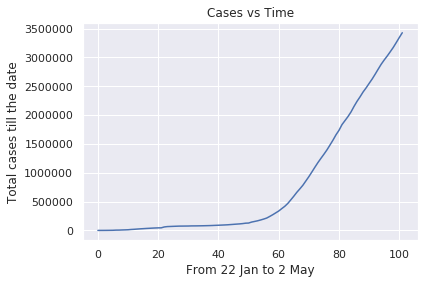

In [ ]:
plt.plot(df2["cumsum"])
plt.ylabel("Total cases till the date")
plt.xlabel("From 22 Jan to 2 May")
plt.title("Cases vs Time")
plt.show()

## China's Analysis Only

In [ ]:
df_china = df[df["Country.Region"]=="China"]
df_china.head()

,Province.State,Country.Region,Lat,Long,date,cases,type
18972,Anhui,China,31.8257,117.2264,2020-01-22,1,confirmed
18973,Anhui,China,31.8257,117.2264,2020-01-23,8,confirmed
18974,Anhui,China,31.8257,117.2264,2020-01-24,6,confirmed
18975,Anhui,China,31.8257,117.2264,2020-01-25,24,confirmed
18976,Anhui,China,31.8257,117.2264,2020-01-26,21,confirmed


In [ ]:
df_china_1 = pd.DataFrame(df_china.groupby("date")["cases"].sum())
df_china_1.head()

,cases
date,
2020-01-22,593
2020-01-23,98
2020-01-24,291
2020-01-25,505
2020-01-26,693


In [ ]:
df_china_1.reset_index(drop=True, inplace=True)

In [ ]:
df_china_1["cumsum"] = df_china_1["cases"].cumsum()
df_china_1.head()

,cases,cumsum
0,593,593
1,98,691
2,291,982
3,505,1487
4,693,2180


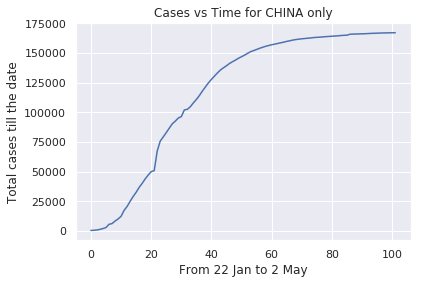

In [ ]:
plt.plot(df_china_1["cumsum"])
plt.ylabel("Total cases till the date")
plt.xlabel("From 22 Jan to 2 May")
plt.title("Cases vs Time for CHINA only")
plt.show()

## World - {China} Analysis

In [ ]:
df_world = df[df["Country.Region"]!="China"]
df_world.head()

,Province.State,Country.Region,Lat,Long,date,cases,type
0,NaN,Afghanistan,33.0,65.0,2020-01-22,0,confirmed
1,NaN,Afghanistan,33.0,65.0,2020-01-23,0,confirmed
2,NaN,Afghanistan,33.0,65.0,2020-01-24,0,confirmed
3,NaN,Afghanistan,33.0,65.0,2020-01-25,0,confirmed
4,NaN,Afghanistan,33.0,65.0,2020-01-26,0,confirmed


In [ ]:
df_world_1 = pd.DataFrame(df_world.groupby("date")["cases"].sum())
df_world_1.head()

,cases
date,
2020-01-22,7
2020-01-23,4
2020-01-24,10
2020-01-25,7
2020-01-26,18


In [ ]:
df_world_1.reset_index(drop=True, inplace=True)

In [ ]:
df_world_1["cumsum"] = df_world_1["cases"].cumsum()
df_world_1.head()

,cases,cumsum
0,7,7
1,4,11
2,10,21
3,7,28
4,18,46


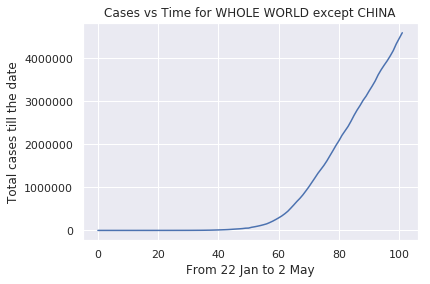

In [ ]:
plt.plot(df_world_1["cumsum"])
plt.ylabel("Total cases till the date")
plt.xlabel("From 22 Jan to 2 May")
plt.title("Cases vs Time for WHOLE WORLD except CHINA")
plt.show()

## Top 10 countries hit hardest by COVID-19

In [ ]:
df_coun = pd.DataFrame(df1.groupby("Country.Region")["cases"].sum())
df_coun.head()

,cases
Country.Region,
Afghanistan,2469
Albania,789
Algeria,4295
Andorra,747
Angola,35


In [ ]:
df_coun_10 = df_coun.sort_values("cases", ascending=False).head(10)
df_coun_10

,cases
Country.Region,
US,1132539
Spain,216582
Italy,209328
United Kingdom,183500
France,168518
Germany,164967
Turkey,124375
Russia,124054
Brazil,97100


In [ ]:
coun_10 = df_coun_10.index.tolist()
print("Top 10 countries hit hardest",coun_10)

Top 10 countries hit hardest ['US', 'Spain', 'Italy', 'United Kingdom', 'France', 'Germany', 'Turkey', 'Russia', 'Brazil', 'Iran']


US


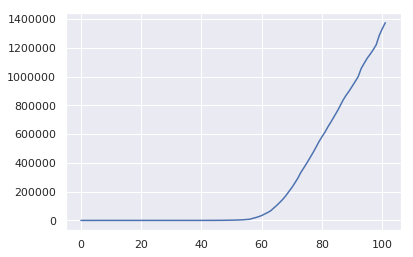



Spain


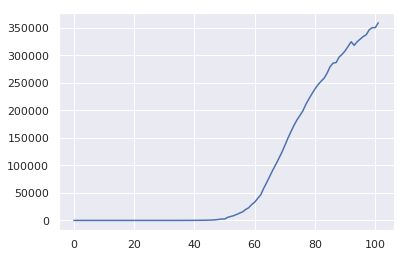



Italy


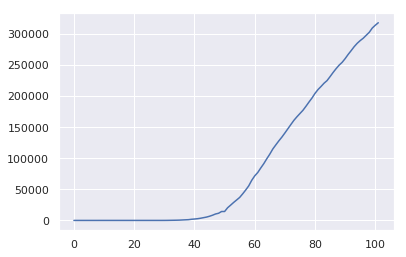



United Kingdom


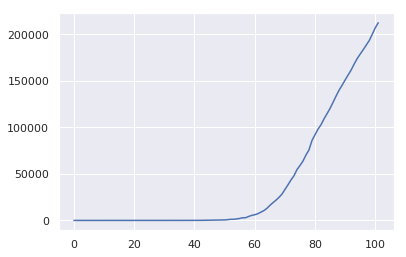



France


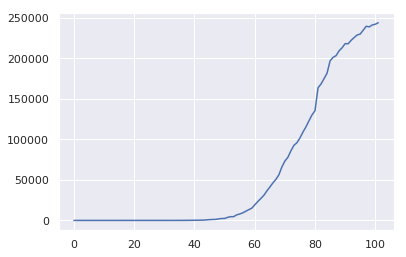



Germany


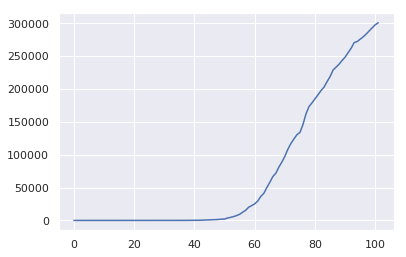



Turkey


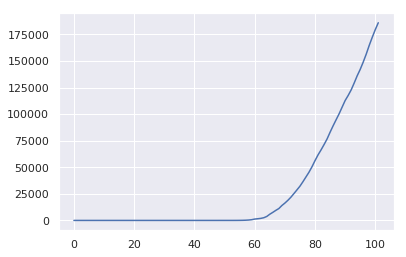



Russia


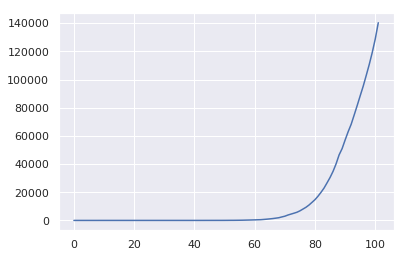



Brazil


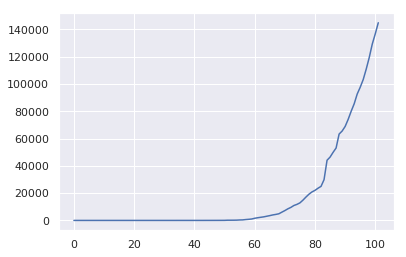



Iran


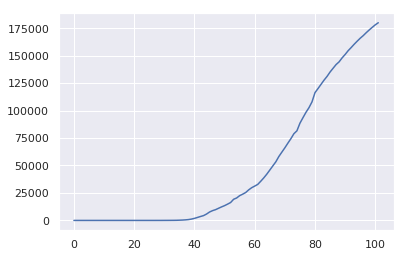

In [ ]:
for coun in coun_10:
    df_country = df[df["Country.Region"]==coun]
    print(coun)
    df1 = pd.DataFrame(df_country.groupby("date")["cases"].sum())
    df1.reset_index(drop=True, inplace=True)
    df1["cumsum"] = df1["cases"].cumsum()
    plt.plot(df1["cumsum"])
    plt.ylabel("Total cases till the date")
    plt.xlabel("From 22 Jan to 2 May")
    plt.title("Cases vs Time")
    plt.show()
    print('\n')
    